In [1]:
# import numpy as np
# import os
import pandas as pd
import time
pd.options.mode.chained_assignment = None

In [2]:
dfile = pd.read_csv("dataset/Test Case Dataset.csv")
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,TEST STEPS,PRECEDENCE,COMPLEXITY,TEST DATA,EXPECTED RESULT,ACTUAL RESULT,PASS/FAIL
0,LOAD_001,Test Page load functionality through URL,None,Enter Invalid URL,H,7,NaN,NaN,NaN,NaN
1,LOAD_002,Test Page Reload without crashes,None,NaN,H,3,NaN,NaN,NaN,NaN
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,NaN,L,3,NaN,NaN,NaN,NaN
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,Choose city from name and icons,M,5,NaN,NaN,NaN,NaN
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,Choose city by Search Bar,M,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,NaN,M,6,NaN,NaN,NaN,NaN
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,NaN,H,10,NaN,NaN,NaN,NaN
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,NaN,H,10,NaN,NaN,NaN,NaN
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,NaN,H,10,NaN,NaN,NaN,NaN


## Data Pre-Processing

Firstly, we drop the columns which aren't necessary for the processing. We will combine it later, before the output.

In [3]:
dfile = dfile.drop(["TEST STEPS","TEST DATA","EXPECTED RESULT", "ACTUAL RESULT", "PASS/FAIL"], axis=1)
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY
0,LOAD_001,Test Page load functionality through URL,None,H,7
1,LOAD_002,Test Page Reload without crashes,None,H,3
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,5
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6
...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,6
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,10
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,10


In [4]:
newdfile = pd.get_dummies(dfile['PRECEDENCE'])
dfile = pd.concat([dfile, newdfile], axis=1)
dfile.head()

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M
0,LOAD_001,Test Page load functionality through URL,None,H,7,1,0,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,5,0,0,1
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1


In [5]:
PRE_CON_COUNT = [0]*dfile['TEST ID'].count()
dfile['PRE_CON_COUNT'] = PRE_CON_COUNT
dfile.head()

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT
0,LOAD_001,Test Page load functionality through URL,None,H,7,1,0,0,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,5,0,0,1,0
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,0


In [6]:
print(dfile['PRE-CONDITIONS'].unique())

['None' 'LOAD_001' 'SELECT_CITY_001' 'SELECT_CITY_002' 'SELECT_CITY_003'
 'HOME_001' 'SIGN_IN_001' 'SIGN_UP_001' 'SEARCHBAR_001' 'CATEGORY_001'
 'RECOMMEND_001' 'MOVIE_LOAD_001' 'BOOK_LOAD_001' 'SHOWTIME_001'
 'SHOWTIME_002' 'SEATS_001' 'SEATS_002' 'SEATS_003' 'PAY_BUTTON_001'
 'PAY_BUTTON_002' 'PAY_INIT_001' 'PAYMENT_OPT_003' 'MOB_WALLET_002'
 'VOUCHER_003' 'UPI_001' 'UPI_002' 'PAY_INIT_002' 'PAY_PORTAL_002'
 'PAY_PORTAL_003' 'CONFIRM_001' 'SESSION_002' 'SESSION_003' 'SESSION_001'
 'EVENT_DETAIL_001' 'EVENT_DETAIL_004' 'BOOK_EVENT_001' 'BOOK_EVENT_003'
 'BOOK_EVENT_004']


In [7]:
for i in dfile['PRE-CONDITIONS']:
    if (i in dfile['TEST ID'].values):
        print("Increase weightage of: ",i, end="\t")
        x = dfile.loc[dfile['TEST ID'] == i].index.values[0]
        print(" at row: ",x, end='\n')
        dfile['PRE_CON_COUNT'][x] = dfile['PRE_CON_COUNT'][x]+1

Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  LOAD_001	 at row:  0
Increase weightage of:  SELECT_CITY_001	 at row:  3
Increase weightage of:  SELECT_CITY_002	 at row:  4
Increase weightage of:  SELECT_CITY_003	 at row:  5
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  SIGN_UP_001	 at row:  14
Increase weightage of:  SIGN_UP_001	 at row:  14
Increase weightage of:  SIGN_IN_001	 at row:  11
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  SEARCHBAR_001	 at row:  18
Increase weightage of:  SEARCHBAR_001	 at row:  18
Increase weightage of:  HOME_001	 at row:  6
Increase weightage of:  CATEGORY_001	 at row:  21
Increase weightage of:  SEARCHBAR_001	

In [8]:
print(dfile['PRE_CON_COUNT'].values)

[ 4  0  0  1  1  1  5  0  0  0  0  4  0  0  2  0  0  0  4  0  0  3  0  0
  0  1  0  0  3  0  0  0  2  0  1  1  2  1  1  0  1  2  9  0  0  0  0  0
  0 11  0  0  0  0  0  0  0  2  0  0  0  0  1  2  4  0  0  0  0  0  2  0
  4  2  0  6  0  0  0  0  0  0  0  0  1  1  1  0  0  3  0  0  1  2  0  1
  1  0  0  0]


In [9]:
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT
0,LOAD_001,Test Page load functionality through URL,None,H,7,1,0,0,4
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,5,0,0,1,1
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,1
...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,6,0,0,1,1
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0,1
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,10,1,0,0,0
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,10,1,0,0,0


In [10]:
print(dfile['PRE-CONDITIONS'].unique())

['None' 'LOAD_001' 'SELECT_CITY_001' 'SELECT_CITY_002' 'SELECT_CITY_003'
 'HOME_001' 'SIGN_IN_001' 'SIGN_UP_001' 'SEARCHBAR_001' 'CATEGORY_001'
 'RECOMMEND_001' 'MOVIE_LOAD_001' 'BOOK_LOAD_001' 'SHOWTIME_001'
 'SHOWTIME_002' 'SEATS_001' 'SEATS_002' 'SEATS_003' 'PAY_BUTTON_001'
 'PAY_BUTTON_002' 'PAY_INIT_001' 'PAYMENT_OPT_003' 'MOB_WALLET_002'
 'VOUCHER_003' 'UPI_001' 'UPI_002' 'PAY_INIT_002' 'PAY_PORTAL_002'
 'PAY_PORTAL_003' 'CONFIRM_001' 'SESSION_002' 'SESSION_003' 'SESSION_001'
 'EVENT_DETAIL_001' 'EVENT_DETAIL_004' 'BOOK_EVENT_001' 'BOOK_EVENT_003'
 'BOOK_EVENT_004']


## Finding Coupling factor

Coupling between 2 test cases can be found by `CbO = Number of links / Number of classes`

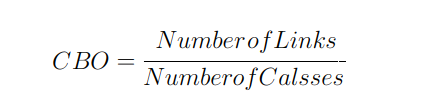

But, as we do not have any classes in the dataset, we consider each unique test case instead

In [11]:
cbo = len(dfile['PRE-CONDITIONS'].unique())

## Adding Weightage column

Weightage column is to find the overall weightage of that particular test case with respect to the factors influencing it

In [12]:
weightage = [0]*dfile['TEST ID'].count()
dfile['WEIGHTAGE'] = weightage

In [13]:
dfile.head()

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT,WEIGHTAGE
0,LOAD_001,Test Page load functionality through URL,None,H,7,1,0,0,4,0
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0,0
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0,0
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,5,0,0,1,1,0
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,1,0


As the main factors influencing the a test case would be the pre-condition and precedence, we take those values. The pre-condition weightage is assigned along with it's coupling factor.

In [14]:
dfile['WEIGHTAGE'] = (dfile['H']*0.9 + 
                      dfile['M']*0.5 +
                      dfile['L']*0.1 + 
                      (dfile['PRE_CON_COUNT']/cbo))*(dfile['COMPLEXITY'])
dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT,WEIGHTAGE
0,LOAD_001,Test Page load functionality through URL,None,H,7,1,0,0,4,7.036842
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0,2.700000
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0,0.300000
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,5,0,0,1,1,2.631579
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,1,3.157895
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,6,0,0,1,1,3.157895
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0,1,9.263158
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,10,1,0,0,0,9.000000
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,10,1,0,0,0,9.000000


In [15]:
print( dfile['WEIGHTAGE'].max())

10.23157894736842


## Fitness Function for algorithms

In [16]:
def fitness_fn(arguments):
    x1, x2, x3, x4, x5 = arguments
    
    if x3 > x1 and x3 > x2:
        x1 = x2 = 0
    if x2 > x1 and x2 > x3:
        x1 = x3 = 0
    if x1 > x2 and x1 > x3:
        x2 = x3 = 0
    
    return (x1*0.9 + x2*0.5 + x3*0.1 + (x4/cbo) )*(x5)

## Find Best values using PSO

We apply PSO to find the best values obtainable for Weightage of a test case

In [17]:
pso_time = time.time()

Running PSO...


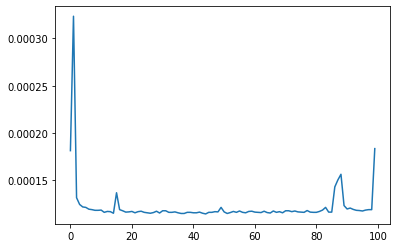

Best values of x:  [0.        0.        0.3121708 0.        1.       ]
Best values of f(x):  14.0


In [18]:
from algo.PSO import PSO

instance = PSO(func=fitness_fn,
               dim=5,
               lb=[0, 0, 0, dfile['PRE_CON_COUNT'].min(), dfile['COMPLEXITY'].min()],
               ub=[1, 1, 1, dfile['PRE_CON_COUNT'].max(), dfile['COMPLEXITY'].max()])
pso_result = instance.run(max_iter=100)

print("Best values of x: ", pso_result.gbest_x)
print("Best values of f(x): ",pso_result.gbest_y)

In [19]:
print("--- PSO took %f seconds ---" % (time.time() - pso_time))

--- PSO took 0.244732 seconds ---


## Re-arrange dataset with results obtained

In [20]:
pso_dfile = dfile.copy()
pso_dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT,WEIGHTAGE
0,LOAD_001,Test Page load functionality through URL,None,H,7,1,0,0,4,7.036842
1,LOAD_002,Test Page Reload without crashes,None,H,3,1,0,0,0,2.700000
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0,0.300000
3,SELECT_CITY_001,Test City Choice using Icons,LOAD_001,M,5,0,0,1,1,2.631579
4,SELECT_CITY_002,Test Search City using Search Bar,LOAD_001,M,6,0,0,1,1,3.157895
...,...,...,...,...,...,...,...,...,...,...
95,BOOK_EVENT_003,Test Add & Remove person functionality,BOOK_EVENT_001,M,6,0,0,1,1,3.157895
96,BOOK_EVENT_004,Test choice of seats,BOOK_EVENT_003,H,10,1,0,0,1,9.263158
97,EVENT_CONFIRM_001,Test transfer to Payment Init,BOOK_EVENT_004,H,10,1,0,0,0,9.000000
98,EVENT_CONFIRM_002,Test transfer to Confirmation Page after payment,PAY_PORTAL_003,H,10,1,0,0,0,9.000000


In [25]:
pso_dfile['DIFF'] = abs( pso_result.gbest_y - pso_dfile['WEIGHTAGE'] )
pso_dfile.sort_values('DIFF', ascending=True, axis=0, inplace = True)
pso_dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT,WEIGHTAGE,DIFF
42,PAY_INIT_001,Check load of Payment page,PAY_BUTTON_002,H,9,1,0,0,9,10.231579,3.768421
72,PAY_PORTAL_002,Test Transaction confirmation,PAY_INIT_002,H,10,1,0,0,4,10.052632,3.947368
70,PAY_INIT_002,Test payment initiation,PAY_BUTTON_002,H,10,1,0,0,2,9.526316,4.473684
75,CONFIRM_001,Test load of Confirmation Page,PAY_PORTAL_003,H,9,1,0,0,6,9.521053,4.478947
6,HOME_001,Test load of Home Page,LOAD_001,H,9,1,0,0,5,9.284211,4.715789
...,...,...,...,...,...,...,...,...,...,...,...
10,HOME_005,Test Return to Home Page on Logo Click,HOME_001,L,3,0,1,0,0,0.300000,13.700000
43,SHOWTIME_003,Test display of Showtime selected,PAY_INIT_001,L,3,0,1,0,0,0.300000,13.700000
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0,0.300000,13.700000
44,TICKET_DETAILS_001,Test dispaly of Ticket Details,PAY_INIT_001,L,3,0,1,0,0,0.300000,13.700000


## Dataset after re-ordering

In [22]:
pso_dfile

,TEST ID,TEST CASE,PRE-CONDITIONS,PRECEDENCE,COMPLEXITY,H,L,M,PRE_CON_COUNT,WEIGHTAGE,DIFF
42,PAY_INIT_001,Check load of Payment page,PAY_BUTTON_002,H,9,1,0,0,9,10.231579,3.768421
72,PAY_PORTAL_002,Test Transaction confirmation,PAY_INIT_002,H,10,1,0,0,4,10.052632,3.947368
70,PAY_INIT_002,Test payment initiation,PAY_BUTTON_002,H,10,1,0,0,2,9.526316,4.473684
75,CONFIRM_001,Test load of Confirmation Page,PAY_PORTAL_003,H,9,1,0,0,6,9.521053,4.478947
6,HOME_001,Test load of Home Page,LOAD_001,H,9,1,0,0,5,9.284211,4.715789
...,...,...,...,...,...,...,...,...,...,...,...
10,HOME_005,Test Return to Home Page on Logo Click,HOME_001,L,3,0,1,0,0,0.300000,13.700000
43,SHOWTIME_003,Test display of Showtime selected,PAY_INIT_001,L,3,0,1,0,0,0.300000,13.700000
2,LOAD_003,Test 404 Error for Invalid URL in domain,None,L,3,0,1,0,0,0.300000,13.700000
44,TICKET_DETAILS_001,Test dispaly of Ticket Details,PAY_INIT_001,L,3,0,1,0,0,0.300000,13.700000


## Find Best values using Another Meta-Heuristic algorithm

## Re-arrange dataset

## Comparative Analysis

In [23]:
# Convert to python3 script file

# !jupyter nbconvert --to script os.path.basename(__file__)